In [ ]:
# Given one project, get all of its features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Main

In [2]:
main = pd.read_csv("./data/project_main.csv",sep=';')
main.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,project_land_size_ngan,project_land_size_wa,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,0,0,NaN,NaN,3500000.0,3862000.0,A,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,3,89,NaN,NaN,4590000.0,NaN,U,2011-02-24T21:43:59.297+0700
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,0,0,0,NaN,NaN,912400.0,1300480.0,U,2009-07-20T07:00:00.000+0700
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,112,0,17,168.0,NaN,3800000.0,NaN,A,2011-04-07T16:56:39.867+0700
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,51,2,29,NaN,NaN,5000000.0,NaN,A,2010-11-10T07:00:00.000+0700


In [3]:
# Calculate project_land_size_meter
main['project_land_size_m'] = 2*100*4*main['project_land_size_rai'] + 2*100*main['project_land_size_ngan'] + 2*main['project_land_size_wa']
del main['project_land_size_rai']
del main['project_land_size_ngan']
del main['project_land_size_wa']
del main['total_unit'] # Dunno what this is.

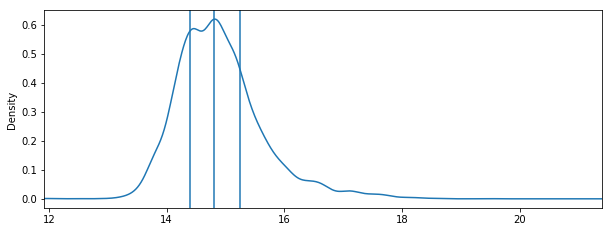

In [4]:
i = 'Log_starting_price'

# Log Transform
main[i] = np.log(main['starting_price'])

q75, q50, q25 = np.percentile(main.Log_starting_price.dropna(), [75 ,50, 25])

min = q25
mid = q50
max = q75

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(main[i].min(), main[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=mid)
plt.axvline(x=max)

ax = main[i].plot(kind='kde')

main['starting_price_range'] = 0

main.loc[main[i] < min, 'starting_price_range'] = 0
main.loc[((main[i] > min) & (main[i] < mid)), 'starting_price_range'] = 1
main.loc[((main[i] > mid) & (main[i] < max)), 'starting_price_range'] = 2
main.loc[main[i] > max, 'starting_price_range'] = 3

main = main.drop(['starting_price',i], axis = 1)

In [7]:
# Project status
main['project_status'] = main['project_status'].apply(lambda x: int(x=="A"))

In [8]:
main['project_status'].value_counts()

1    3997
0    1382
Name: project_status, dtype: int64

In [14]:
preped = main

## Facility

In [15]:
facs = ["สระว่ายน้ำ",'คลับเฮ้าส์','สวนสาธารณะง','ฟิตเนส','ระบบรักษาความปลอดภัย','สนามเด็กเล่น']

In [16]:
facility = pd.read_csv("./data/project_facility.csv",sep=';')

In [17]:
# Groupby project_id
facility_grouped = facility.groupby("project_id").agg({"facility_id":list})
facility_grouped['pool'] = facility_grouped.facility_id.apply(lambda x: int(1 in x))
facility_grouped['clubhouse'] = facility_grouped.facility_id.apply(lambda x: int(2 in x))
facility_grouped['park'] = facility_grouped.facility_id.apply(lambda x: int(3 in x))
facility_grouped['fitness'] = facility_grouped.facility_id.apply(lambda x: int(4 in x))
facility_grouped['security'] = facility_grouped.facility_id.apply(lambda x: int(5 in x))
facility_grouped['playground'] = facility_grouped.facility_id.apply(lambda x: int(6 in x))
del facility_grouped['facility_id']
facility_grouped.head()

,pool,clubhouse,park,fitness,security,playground
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


In [18]:
preped2 = pd.merge(preped,facility_grouped,on='project_id',how='left')
preped2.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,...,project_status,created_at,project_land_size_m,starting_price_range,pool,clubhouse,park,fitness,security,playground
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,...,1,2011-01-14T18:40:12.117+0700,43200,2,1.0,0.0,1.0,0.0,0.0,0.0
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,...,0,2011-02-24T21:43:59.297+0700,123978,3,0.0,0.0,1.0,1.0,0.0,1.0
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,...,0,2009-07-20T07:00:00.000+0700,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,...,1,2011-04-07T16:56:39.867+0700,89634,2,0.0,0.0,0.0,1.0,1.0,0.0
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,...,1,2010-11-10T07:00:00.000+0700,41258,3,1.0,1.0,1.0,0.0,1.0,0.0


## Project Unit

In [19]:
unit = pd.read_csv("./data/project_unit.csv",sep=';')
unit = unit.groupby("project_id").agg('mean')

In [20]:
## Handle unique and missing case
unit.isnull().sum() / len(unit)

unit_type_id                           0.000000
amount_bedroom                         0.277189
amount_bathroom                        0.275888
amount_car_parking                     0.501952
unit_starting_land_size                0.673359
unit_highest_land_size                 0.905745
unit_functional_space_starting_size    0.338911
unit_functional_space_highest_size     0.827291
starting_price                         0.824875
highest_price                          0.972300
starting_price_per_area                0.992935
dtype: float64

In [21]:
# For car parking, we'll assume that null is 0
unit['amount_car_parking'] = unit['amount_car_parking'].fillna(0)

In [22]:
# Remove columns that has more null than 50 percent.
unit = unit.dropna(axis=1,thresh=0.5*unit.shape[0])

In [23]:
# Find out why some has no bedroom.
unit = unit[unit['amount_bedroom'].notnull()]
unit = unit[unit['amount_bathroom'].notnull()]
unit['hasUnit'] = 1
unit.head()

,unit_type_id,amount_bedroom,amount_bathroom,amount_car_parking,unit_functional_space_starting_size,hasUnit
project_id,,,,,,
4,1.0,3.0,3.000000,2.00,174.333333,1
29,1.0,2.5,1.500000,2.00,105.000000,1
44,1.0,3.0,2.250000,1.25,141.000000,1
45,1.0,3.0,2.833333,2.00,180.333333,1
73,1.0,3.0,2.750000,2.00,136.697500,1


In [24]:
preped3 = pd.merge(preped2, unit.reset_index(), on='project_id',how='left')
preped3['hasUnit'].fillna(0,inplace=True)
print(preped3.shape)
preped3.head()

(5379, 27)


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,...,park,fitness,security,playground,unit_type_id,amount_bedroom,amount_bathroom,amount_car_parking,unit_functional_space_starting_size,hasUnit
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,...,1.0,0.0,0.0,0.0,1.0,3.000000,2.25,1.25,141.000000,1.0
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,...,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,...,0.0,1.0,1.0,0.0,1.0,3.000000,2.75,2.00,136.697500,1.0
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,...,1.0,0.0,1.0,0.0,1.0,3.285714,3.00,2.00,153.285714,1.0


## Project Clicked Number

In [25]:
user = pd.read_csv("./data/userLog_201801_201802_for_participants.csv",sep=';')


In [26]:
# Datetime
user['datetime'] = user['year'].astype(str)+"-" + user['month'].astype(str) +"-" +user['day'].astype(str)+" "+user['hour'].astype(str)+":00:00"
user['datetime'] = pd.to_datetime(user['datetime'])

In [27]:
user1 = user.groupby("project_id").agg({"userCode":'count',"pageReferrer":lambda x: list(x),"userAgent":lambda x: list(x),"requestedDevice":lambda x: list(x),"datetime":['first','last']})
user1.columns = ['clickedCount',"pageReferrer",'userAgent','requestedDevice','begin_clicked','end_clicked']
user1.head()

,clickedCount,pageReferrer,userAgent,requestedDevice,begin_clicked,end_clicked
project_id,,,,,,
4,231,"[Google, Other_PageReferer, Google, HomeWebsit...","[Windows, Windows, Windows, Windows, iPhone, A...","[Desktop, Desktop, Desktop, Desktop, Mobile, M...",2018-01-02 11:00:00,2018-02-22 16:00:00
24,37,"[Google, Google, Google, Google, Google, Googl...","[iPhone, Windows, iPhone, iPhone, Windows, And...","[Mobile, Desktop, Mobile, Mobile, Desktop, Mob...",2018-01-04 12:00:00,2018-02-20 14:00:00
29,60,"[Google, Google, Google, Google, Google, Googl...","[Android, Windows, Android, Windows, Android, ...","[Mobile, Desktop, Mobile, Desktop, Mobile, Mob...",2018-01-01 16:00:00,2018-02-20 01:00:00
41,1,[Other_PageReferer],[Windows],[Desktop],2018-02-14 14:00:00,2018-02-14 14:00:00
44,444,"[Google, Google, Google, Google, Google, Other...","[Android, Windows, iPhone, Android, iPhone, An...","[Mobile, Desktop, Mobile, Mobile, Mobile, Mobi...",2018-01-01 15:00:00,2018-02-22 23:00:00


In [28]:
def countOccur(l, target, ratio=False):
    if not ratio: return len([i for i in l if i==target])
    else: return len([i for i in l if i==target])/len(l)

In [29]:
# User Requested device
asRatio = False
user1['mobile_count'] = user1['requestedDevice'].apply(lambda x:countOccur(x,'Mobile',asRatio))
user1['desktop_count'] = user1['requestedDevice'].apply(lambda x:countOccur(x,'Desktop',asRatio))
del user1['requestedDevice']

In [30]:
# User Agent
user2 = user1.copy()
asRatio = True
user2['window_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Windows',asRatio))
user2['android_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Android',asRatio))
user2['iPhone_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'iPhone',asRatio))
user2['iPad_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'iPad',asRatio))
user2['other_os_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Other_OS',asRatio))
user2['macintosh_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Macintosh',asRatio))
del user2['userAgent']


asRatio = True
user2['google_count'] = user2['pageReferrer'].apply(lambda x:countOccur(x,'Google',asRatio))
user2['homewebsite_count'] = user2['pageReferrer'].apply(lambda x:countOccur(x,'HomeWebsite',asRatio))
user2['other_website_count'] = user2['pageReferrer'].apply(lambda x:countOccur(x,'Other_PageReferer',asRatio))
user2['facebook_count'] = user2['pageReferrer'].apply(lambda x:countOccur(x,'Facebook',asRatio))

del user2['pageReferrer']
user2.head()

,clickedCount,begin_clicked,end_clicked,mobile_count,desktop_count,window_count,android_count,iPhone_count,iPad_count,other_os_count,macintosh_count,google_count,homewebsite_count,other_website_count,facebook_count
project_id,,,,,,,,,,,,,,,
4,231,2018-01-02 11:00:00,2018-02-22 16:00:00,126,105,0.385281,0.329004,0.190476,0.047619,0.021645,0.025974,0.497835,0.103896,0.147186,0.251082
24,37,2018-01-04 12:00:00,2018-02-20 14:00:00,22,15,0.378378,0.324324,0.270270,0.027027,0.000000,0.000000,0.756757,0.000000,0.243243,0.000000
29,60,2018-01-01 16:00:00,2018-02-20 01:00:00,43,17,0.266667,0.550000,0.183333,0.000000,0.000000,0.000000,0.950000,0.000000,0.050000,0.000000
41,1,2018-02-14 14:00:00,2018-02-14 14:00:00,0,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
44,444,2018-01-01 15:00:00,2018-02-22 23:00:00,254,190,0.324324,0.344595,0.234234,0.015766,0.049550,0.031532,0.209459,0.666667,0.119369,0.004505


In [31]:
# Begin clicked

def extracted_date_feature(df, col_name,prefix):
    
    newDf = pd.DataFrame({})
    newDf[prefix+'dow'] = df[col_name].apply(lambda x: x.weekday())
    newDf[prefix+'mon'] = df[col_name].apply(lambda x: x.month)
    newDf[prefix+'day'] = df[col_name].apply(lambda x: x.day)
    newDf[prefix+'hour'] = df[col_name].apply(lambda x: x.hour)
    times_of_day = [0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5 ]    
    newDf[prefix+'time_of_day'] = df[col_name].apply(lambda x: times_of_day[x.hour])
    return newDf


user3 = user2.merge(extracted_date_feature(user2, "begin_clicked","b_"), on='project_id')
user3 = user3.merge(extracted_date_feature(user3, "end_clicked","e_"), on='project_id')

del user3['begin_clicked']
del user3['end_clicked']

In [32]:
user4 = user3.reset_index()
user4['beenClicked'] = 1
user4.head()

,project_id,clickedCount,mobile_count,desktop_count,window_count,android_count,iPhone_count,iPad_count,other_os_count,macintosh_count,...,b_mon,b_day,b_hour,b_time_of_day,e_dow,e_mon,e_day,e_hour,e_time_of_day,beenClicked
0,4,231,126,105,0.385281,0.329004,0.190476,0.047619,0.021645,0.025974,...,1,2,11,2,3,2,22,16,4,1
1,24,37,22,15,0.378378,0.324324,0.270270,0.027027,0.000000,0.000000,...,1,4,12,2,1,2,20,14,3,1
2,29,60,43,17,0.266667,0.550000,0.183333,0.000000,0.000000,0.000000,...,1,1,16,4,1,2,20,1,0,1
3,41,1,0,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,14,14,3,2,2,14,14,3,1
4,44,444,254,190,0.324324,0.344595,0.234234,0.015766,0.049550,0.031532,...,1,1,15,3,3,2,22,23,5,1


In [33]:
preped4 = pd.merge(preped3,user4, on='project_id',how='left')

In [34]:
preped4.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,...,b_mon,b_day,b_hour,b_time_of_day,e_dow,e_mon,e_day,e_hour,e_time_of_day,beenClicked
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,...,1.0,1.0,15.0,3.0,3.0,2.0,22.0,23.0,5.0,1.0
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,...,1.0,4.0,12.0,2.0,1.0,2.0,20.0,14.0,3.0,1.0
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,...,2.0,15.0,10.0,2.0,3.0,2.0,15.0,10.0,2.0,1.0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,...,1.0,1.0,22.0,5.0,3.0,2.0,22.0,17.0,4.0,1.0
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,...,1.0,1.0,21.0,5.0,3.0,2.0,15.0,10.0,2.0,1.0


In [35]:
preped4.to_csv("./clean_data/proj.csv",index=False)